<a href="https://colab.research.google.com/github/sathyajain12/PhD-implementations/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
blobs = pd.read_csv('/content/kmeans_blobs.csv')
colnames = list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


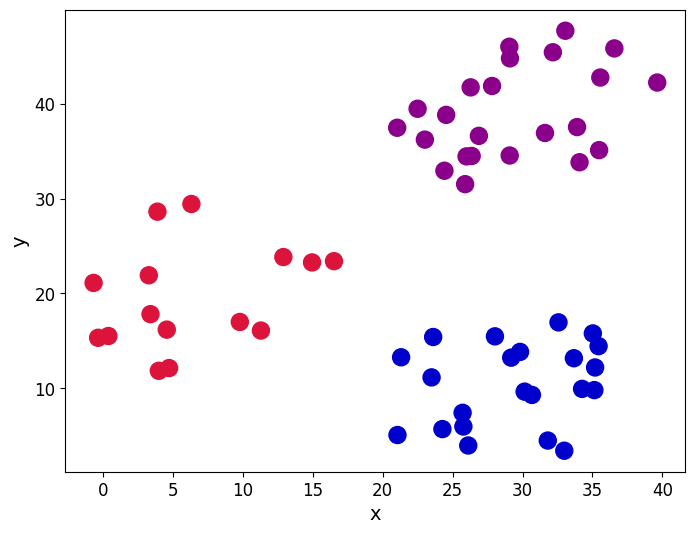

In [3]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids

,x,y
0,24.412,32.932
5,25.893,31.515
36,26.878,36.609


In [5]:
#Calculate the root of sum of squared errors.
#a and b are numpy arrays
def rsserr(a,b):
  return np.square(np.sum((a-b)**2))

In [6]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 384.22
Error for centroid 1: 724.64
Error for centroid 2: 0.00


In [7]:
def centroid_assigining(dset, centroids):
  k=centroids.shape[0]
  n=dset.shape[0]
  assigining=[]
  assign_errors=[]

  for obs in range(n):
    all_errors=np.array([])
    for centroid in range(k):
      err=rsserr(centroids.iloc[centroid,:],dset.iloc[obs,:])
      all_errors=np.append(all_errors,err)

    #get the nearest centroid and the error
    nearest_centroid=np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error=np.amin(all_errors)

    #add values to corresponding lists
    assigining.append(nearest_centroid)
    assign_errors.append(nearest_centroid_error)

  return assigining, assign_errors

In [8]:
df['centroid'], df['error']=centroid_assigining(df, centroids)
df.head()

<ipython-input-8-a13cd6ab3f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error']=centroid_assigining(df, centroids)


,x,y,centroid,error
0,24.412,32.932,0,0.000000
1,35.190,12.189,1,211534.211314
2,26.288,41.718,2,699.601495
3,0.376,15.506,0,776856.744109
4,26.116,3.963,1,576327.599678


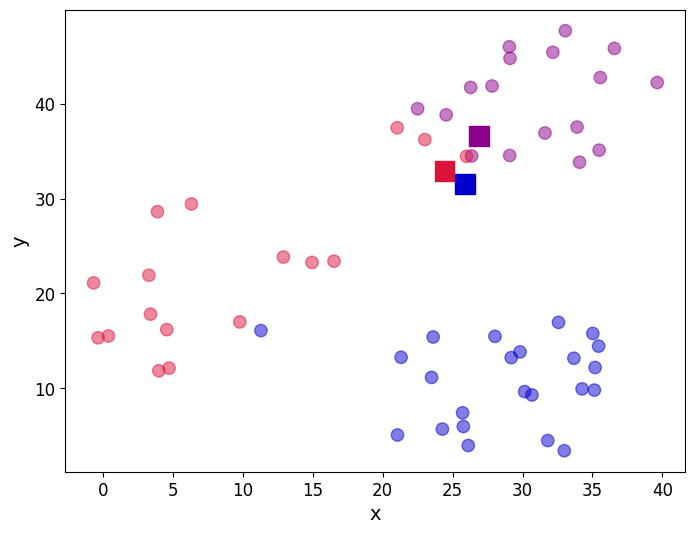

In [9]:
fig, ax= plt.subplots(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],marker="o",
            c=df['centroid'].astype('category'),
            cmap=customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0],centroids.iloc[:,1],
            marker='s',s=200, c=[0,1,2],
            cmap=customcmap)

ax.set_xlabel(r'x',fontsize=14)
ax.set_ylabel(r'y',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
print("the total error is {0:.2f}".format(df['error'].sum()))

the total error is 11927659.01


In [15]:
#Updating centroid location
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,9.889444,23.242611
1,28.435750,11.546250
2,30.759333,40.311167


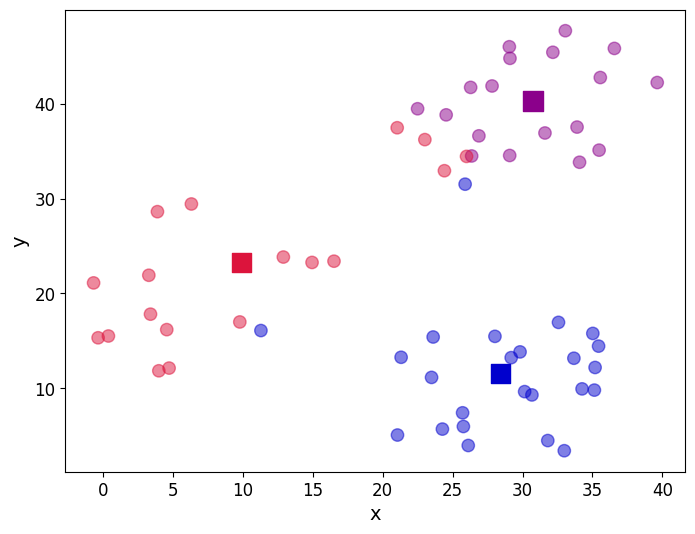

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
#calculating the distance to each centroid, assigning observation and updating the centroid location

def kmeans(dset, k=2, tol=1e-4):

  working_dset=dset.copy()

  err=[]
  goahead=True
  j=0

  #step 2 intiating clusters by defining centroids
  centroids=initiate_centroids(k,dset)

  while(goahead):
    #step 3 and 4-assigning centroids and calculate error
    working_dset['centroid'],j_err=centroid_assigining(working_dset,centroids)
    err.append(sum(j_err))

    #step 5-Update centroid position
    centroids=working_dset.groupby('centroid').agg('mean').reset_index(drop=True)

    #step 6-Restarting the iteration

    if j>0:
      #is the error less than tolerance(1e-4)

      if err[j-1]-err[j]<=tol:
        goahead=False
    j+=1
  working_dset['centroid'],j_err=centroid_assigining(working_dset,centroids)
  centroids=working_dset.groupby('centroid').agg('mean').reset_index(drop=True)
  return working_dset['centroid'],j_err, centroids

In [20]:
np.random.seed(42)
df['centroid'],df['error'], centroids= kmeans(df[['x','y']],3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,3767.568743
1,35.190,12.189,1,1399.889001
2,26.288,41.718,2,262.961097
3,0.376,15.506,0,2683.086425
4,26.116,3.963,1,2723.650198


In [21]:
centroids

,x,y
0,6.322867,19.559800
1,29.330864,10.432409
2,29.304957,39.050783


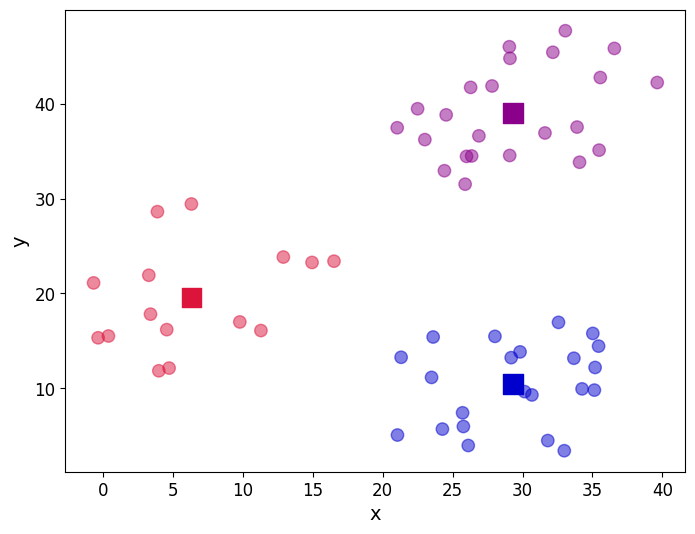

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

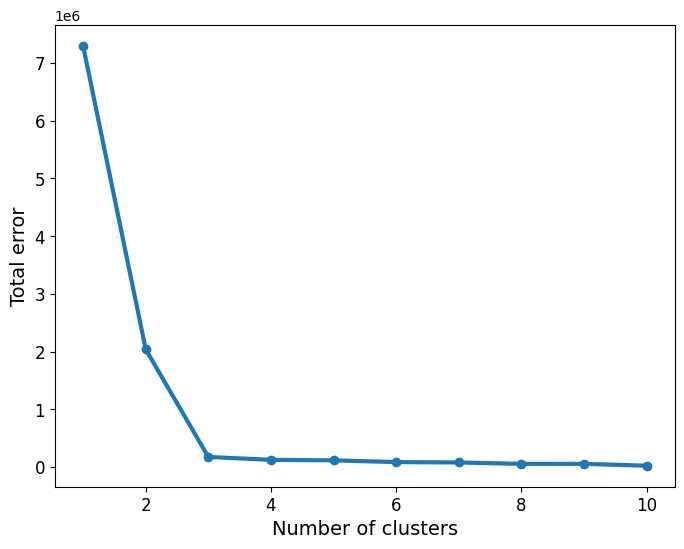

In [23]:
err_total = []
n = 10

df_elbow = blobs[['x','y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()